## Size-Luminosity relation

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# First import some things we are gonna need
import treecorr
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Import the LSBG  catalog

In [2]:
import pandas as pd

LSBG_df = pd.read_csv('LSBG_catalog.csv')

# Magnitudes
mag_g = LSBG_df['mag_gfm_g_corr'].values
mag_r = LSBG_df['mag_gfm_r_corr'].values
mag_i = LSBG_df['mag_gfm_i_corr'].values

# Effec
R_eff_g = LSBG_df['r_eff_g'].values
R_eff_r = LSBG_df['r_eff_r'].values
R_eff_i = LSBG_df['r_eff_i'].values

n_ser = LSBG_df['n'].values

#Ellipticity
Ell = LSBG_df['ell_gfm'].values

#Calculate axis ratio = b/a
AR = 1.0 - Ell

# RA and DEC
RA = LSBG_df['ra_gfm'].values
DEC = LSBG_df['dec_gfm'].values

# =====================================================
# =====================================================
# Mean and central surface brightnesses

# Mean surface brightness
mu_mean_g = LSBG_df['mu_mean_g'].values
mu_mean_r = LSBG_df['mu_mean_r'].values
mu_mean_i = LSBG_df['mu_mean_i'].values

# Central surface brightness 
mu_cent_g = LSBG_df['mu_0_g'].values
mu_cent_r = LSBG_df['mu_0_r'].values
mu_cent_i = LSBG_df['mu_0_i'].values

##### Define coordinates and distances to the 9 most prominent peaks

I have decided to center everything to its best association.

In [3]:
# Right Ascension of the peaks
peaks_RA = [21.4200,55.0475,9.8882,17.6017,18.4758,54.6162,16.9299,21.3746,10.0270]

# Declination of the peaks
peaks_DEC = [-1.4072,-18.5875,3.1385,-45.9228,-31.7519, -35.4483,-46.9165,1.7627,-56.1167]

#Distance to the peaks in Mpc
peaks_dists = [75.07,23.41,62.81,106.61,84.80,18.97,102.03,18.97,72.32,120.23]

In [4]:
MAP = hp.read_map('y3a2_footprint_grizY_any.fits')

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [5]:
rad_to_deg = 180.0/np.pi

rad_i_1 = np.zeros(48)
mag_i_1 = np.zeros(48)
rad_1 = np.zeros(48)
mag_1 = np.zeros(48)
dist_1 = np.zeros(48)
mu_cent_1 = np.zeros(48)
# ==========================
# ==========================
rad_i_2 = np.zeros(102)
mag_i_2 = np.zeros(102)
rad_2 = np.zeros(102)
mag_2 = np.zeros(102)
dist_2 = np.zeros(102)
mu_cent_2 = np.zeros(102)
# ==========================
# ==========================
rad_i_3 = np.zeros(43)
mag_i_3 = np.zeros(43)
rad_3 = np.zeros(43)
mag_3 = np.zeros(43)
dist_3 = np.zeros(43)
mu_cent_3 = np.zeros(43)
# ==========================
# ==========================
rad_i_4 = np.zeros(21)
mag_i_4 = np.zeros(21)
rad_4 = np.zeros(21)
mag_4 = np.zeros(21)
dist_4 = np.zeros(21)
mu_cent_4 = np.zeros(21)
# ==========================
# ==========================
rad_i_5 = np.zeros(27)
mag_i_5 = np.zeros(27)
rad_5 = np.zeros(27)
mag_5 = np.zeros(27)
dist_5 = np.zeros(27)
mu_cent_5 = np.zeros(27)
# ==========================
# ==========================
rad_i_6 = np.zeros(175)
mag_i_6 = np.zeros(175)
rad_6 = np.zeros(175)
mag_6 = np.zeros(175)
dist_6 = np.zeros(175)
mu_cent_6 = np.zeros(175)
# ==========================
# ==========================
rad_i_7 = np.zeros(17)
mag_i_7 = np.zeros(17)
rad_7 = np.zeros(17)
mag_7 = np.zeros(17)
dist_7 = np.zeros(17)
mu_cent_7 = np.zeros(17)
# ==========================
# ==========================
rad_i_8 = np.zeros(97)
mag_i_8 = np.zeros(97)
rad_8 = np.zeros(97)
mag_8 = np.zeros(97)
dist_8 = np.zeros(97)
mu_cent_8 = np.zeros(97)
# ==========================
# ==========================
rad_i_9 = np.zeros(25)
mag_i_9 = np.zeros(25)
rad_9 = np.zeros(25)
mag_9 = np.zeros(25)
dist_9 = np.zeros(25)
mu_cent_9 = np.zeros(25)

for i in range(9): # In the range of the peaks
    
    ra_pk = peaks_RA[i] # RA of the i-th peak
    dec_pk = peaks_DEC[i] # DEC of the i-th peak
    dist_pk = peaks_dists[i] # Distance of the i-th peak in Mpc
    
    
    # Create a box to select LSB galaxies
    ra_up = ra_pk+4.0
    ra_low = ra_pk-4.0
    dec_up = dec_pk+4.0
    dec_low = dec_pk-4.0
    
    box_LSB = (RA>ra_low)&(RA<ra_up)&(DEC>dec_low)&(DEC<dec_up)
    # Keep the LSB galaxies inside the box
    ra_lsb_pk = RA[box_LSB] # ra
    dec_lsb_pk = DEC[box_LSB] # dec
    R_eff_g_pk = R_eff_g[box_LSB] # Effective radius
    R_eff_i_pk = R_eff_i[box_LSB] # i-band Effective radius
    mag_g_pk = mag_g[box_LSB] # magnitude in the g band
    mag_i_pk = mag_i[box_LSB] # magnitude in the i band
    mu_cent_pk = mu_cent_g[box_LSB]
    # =====================================================================
    # =====================================================================
    
    # Calculate now the angular extend of 0.5Mpc at the distance of the i-th peak
    ang_05mpc = rad_to_deg*(0.5/dist_pk)
    
    # Create object for the position of the peak
    C_pk = SkyCoord(ra=ra_pk*u.degree, dec=dec_pk*u.degree, frame='icrs')
    # Create object for the lsb galaxies
    C_lsb_pk = SkyCoord(ra=ra_lsb_pk*u.degree, dec=dec_lsb_pk*u.degree, frame='icrs')
    # =====================================================
    # Calculate angular separations
    sep_lsb_pk = C_lsb_pk.separation(C_pk).deg # Separation between peak and lsbs
    
    
    # Keep Effective radii and magnitudes with a separation less than 0.5 Mpc
    R_eff_g_05mpc = R_eff_g_pk[sep_lsb_pk<ang_05mpc]
    R_eff_i_05mpc = R_eff_i_pk[sep_lsb_pk<ang_05mpc]
    mag_g_05mpc = mag_g_pk[sep_lsb_pk<ang_05mpc]
    mag_i_05mpc = mag_i_pk[sep_lsb_pk<ang_05mpc]
    dist_05mpc = sep_lsb_pk[sep_lsb_pk<ang_05mpc] 
    mu_cent_05mpc = mu_cent_pk[sep_lsb_pk<ang_05mpc]
    
    # Now estimate the physical radius (in pc) and the absolute magnitude 
    # of the LSB galaxies around the peak
    
    deg_to_rad = 0.0174533
    radius_g = R_eff_g_05mpc*dist_pk*(4.848)
    radius_i = R_eff_i_05mpc*dist_pk*(4.848)
    Abs_mag_g = mag_g_05mpc +5.0 - 5.0*np.log10(dist_pk*1.0e6)
    Abs_mag_i = mag_i_05mpc +5.0 - 5.0*np.log10(dist_pk*1.0e6)
    phys_dist = dist_05mpc*dist_pk*(1.0e6)*deg_to_rad
    
    if (i==0):
        rad_1[:] = radius_g
        mag_1[:] = Abs_mag_g
        rad_i_1[:] = radius_i
        mag_i_1[:] = Abs_mag_i
        dist_1[:] = phys_dist
        mu_cent_1[:] = mu_cent_05mpc
    elif (i==1):
        rad_2[:] = radius_g
        mag_2[:] = Abs_mag_g
        rad_i_2[:] = radius_i
        mag_i_2[:] = Abs_mag_i
        dist_2[:] = phys_dist
        mu_cent_2[:] = mu_cent_05mpc
    elif (i==2):
        rad_3[:] = radius_g
        mag_3[:] = Abs_mag_g
        rad_i_3[:] = radius_i
        mag_i_3[:] = Abs_mag_i
        dist_3[:] = phys_dist
        mu_cent_3[:] = mu_cent_05mpc
    elif (i==3):
        rad_4[:] = radius_g
        mag_4[:] = Abs_mag_g
        rad_i_4[:] = radius_i
        mag_i_4[:] = Abs_mag_i
        dist_4[:] = phys_dist
        mu_cent_4[:] = mu_cent_05mpc
    elif (i==4):
        rad_5[:] = radius_g
        mag_5[:] = Abs_mag_g
        rad_i_5[:] = radius_i
        mag_i_5[:] = Abs_mag_i
        dist_5[:] = phys_dist
        mu_cent_5[:] = mu_cent_05mpc
    elif (i==5):
        rad_6[:] = radius_g
        mag_6[:] = Abs_mag_g
        rad_i_6[:] = radius_i
        mag_i_6[:] = Abs_mag_i
        dist_6[:] = phys_dist
        mu_cent_6[:] = mu_cent_05mpc
    elif (i==6):
        rad_7[:] = radius_g
        mag_7[:] = Abs_mag_g
        rad_i_7[:] = radius_i
        mag_i_7[:] = Abs_mag_i
        dist_7[:] = phys_dist
        mu_cent_7[:] = mu_cent_05mpc
    elif (i==7):
        rad_8[:] = radius_g
        mag_8[:] = Abs_mag_g
        rad_i_8[:] = radius_i
        mag_i_8[:] = Abs_mag_i
        dist_8[:] = phys_dist
        mu_cent_8[:] = mu_cent_05mpc
    elif (i==8):
        rad_9[:] = radius_g
        mag_9[:] = Abs_mag_g
        rad_i_9[:] = radius_i
        mag_i_9[:] = Abs_mag_i
        dist_9[:] = phys_dist
        mu_cent_9[:] = mu_cent_05mpc
    #print(len(radius_g))

If we want a relationship between absolute magnitude, surface brightness and effective radius (in pc), this is given by: 

\begin{equation}
R_p = (4.848\times 10^{-6}) \times 10^{\frac{5+\langle \mu \rangle - M -2.5\log 2\pi}{5}}
\end{equation}

In [6]:
M_mag = np.linspace(-19,8,500)

def R_arr(mu_mn):
    
    alpha = (5.0+mu_mn-M_mag-2.5*np.log10(2.0*np.pi))/5.0
    
    R_a = (4.848*1.0e-6)*(10.0**alpha)
    return R_a

R_arr_24 = R_arr(24.)
R_arr_25 = R_arr(25.)
R_arr_26 = R_arr(26.)
R_arr_27 = R_arr(27.)
R_arr_28 = R_arr(28.)

In [7]:
print(len(rad_1[rad_1>1500]))
print(len(rad_2[rad_2>1500]))
print(len(rad_3[rad_3>1500]))
print(len(rad_4[rad_4>1500]))
print(len(rad_5[rad_5>1500]))
print(len(rad_6[rad_6>1500]))
print(len(rad_7[rad_7>1500]))
print(len(rad_8[rad_8>1500]))
print(len(rad_9[rad_9>1500]))

26
1
11
20
18
9
12
0
4


In [8]:
print(len(rad_1),len(rad_2),len(rad_3),len(rad_4),len(rad_5),len(rad_6),len(rad_7),len(rad_8),len(rad_9))

(48, 102, 43, 21, 27, 175, 17, 97, 25)


In [9]:
print(48+102+43+21+27+175+17+97+25)

555


Calculate the physical scale size at which 2''.5 corresponds to 

In [10]:
x_s = np.linspace(-8,-18,200)
y_s = 1839.33*np.ones(200)
y_s = 1500.0*np.ones(200)
y_s_2 = 229.91*np.ones(200)

arc_to_rad = 2.5*4.84814
lower_lims = arc_to_rad*np.asarray(peaks_dists)
x_s = np.linspace(-8,-18,200)

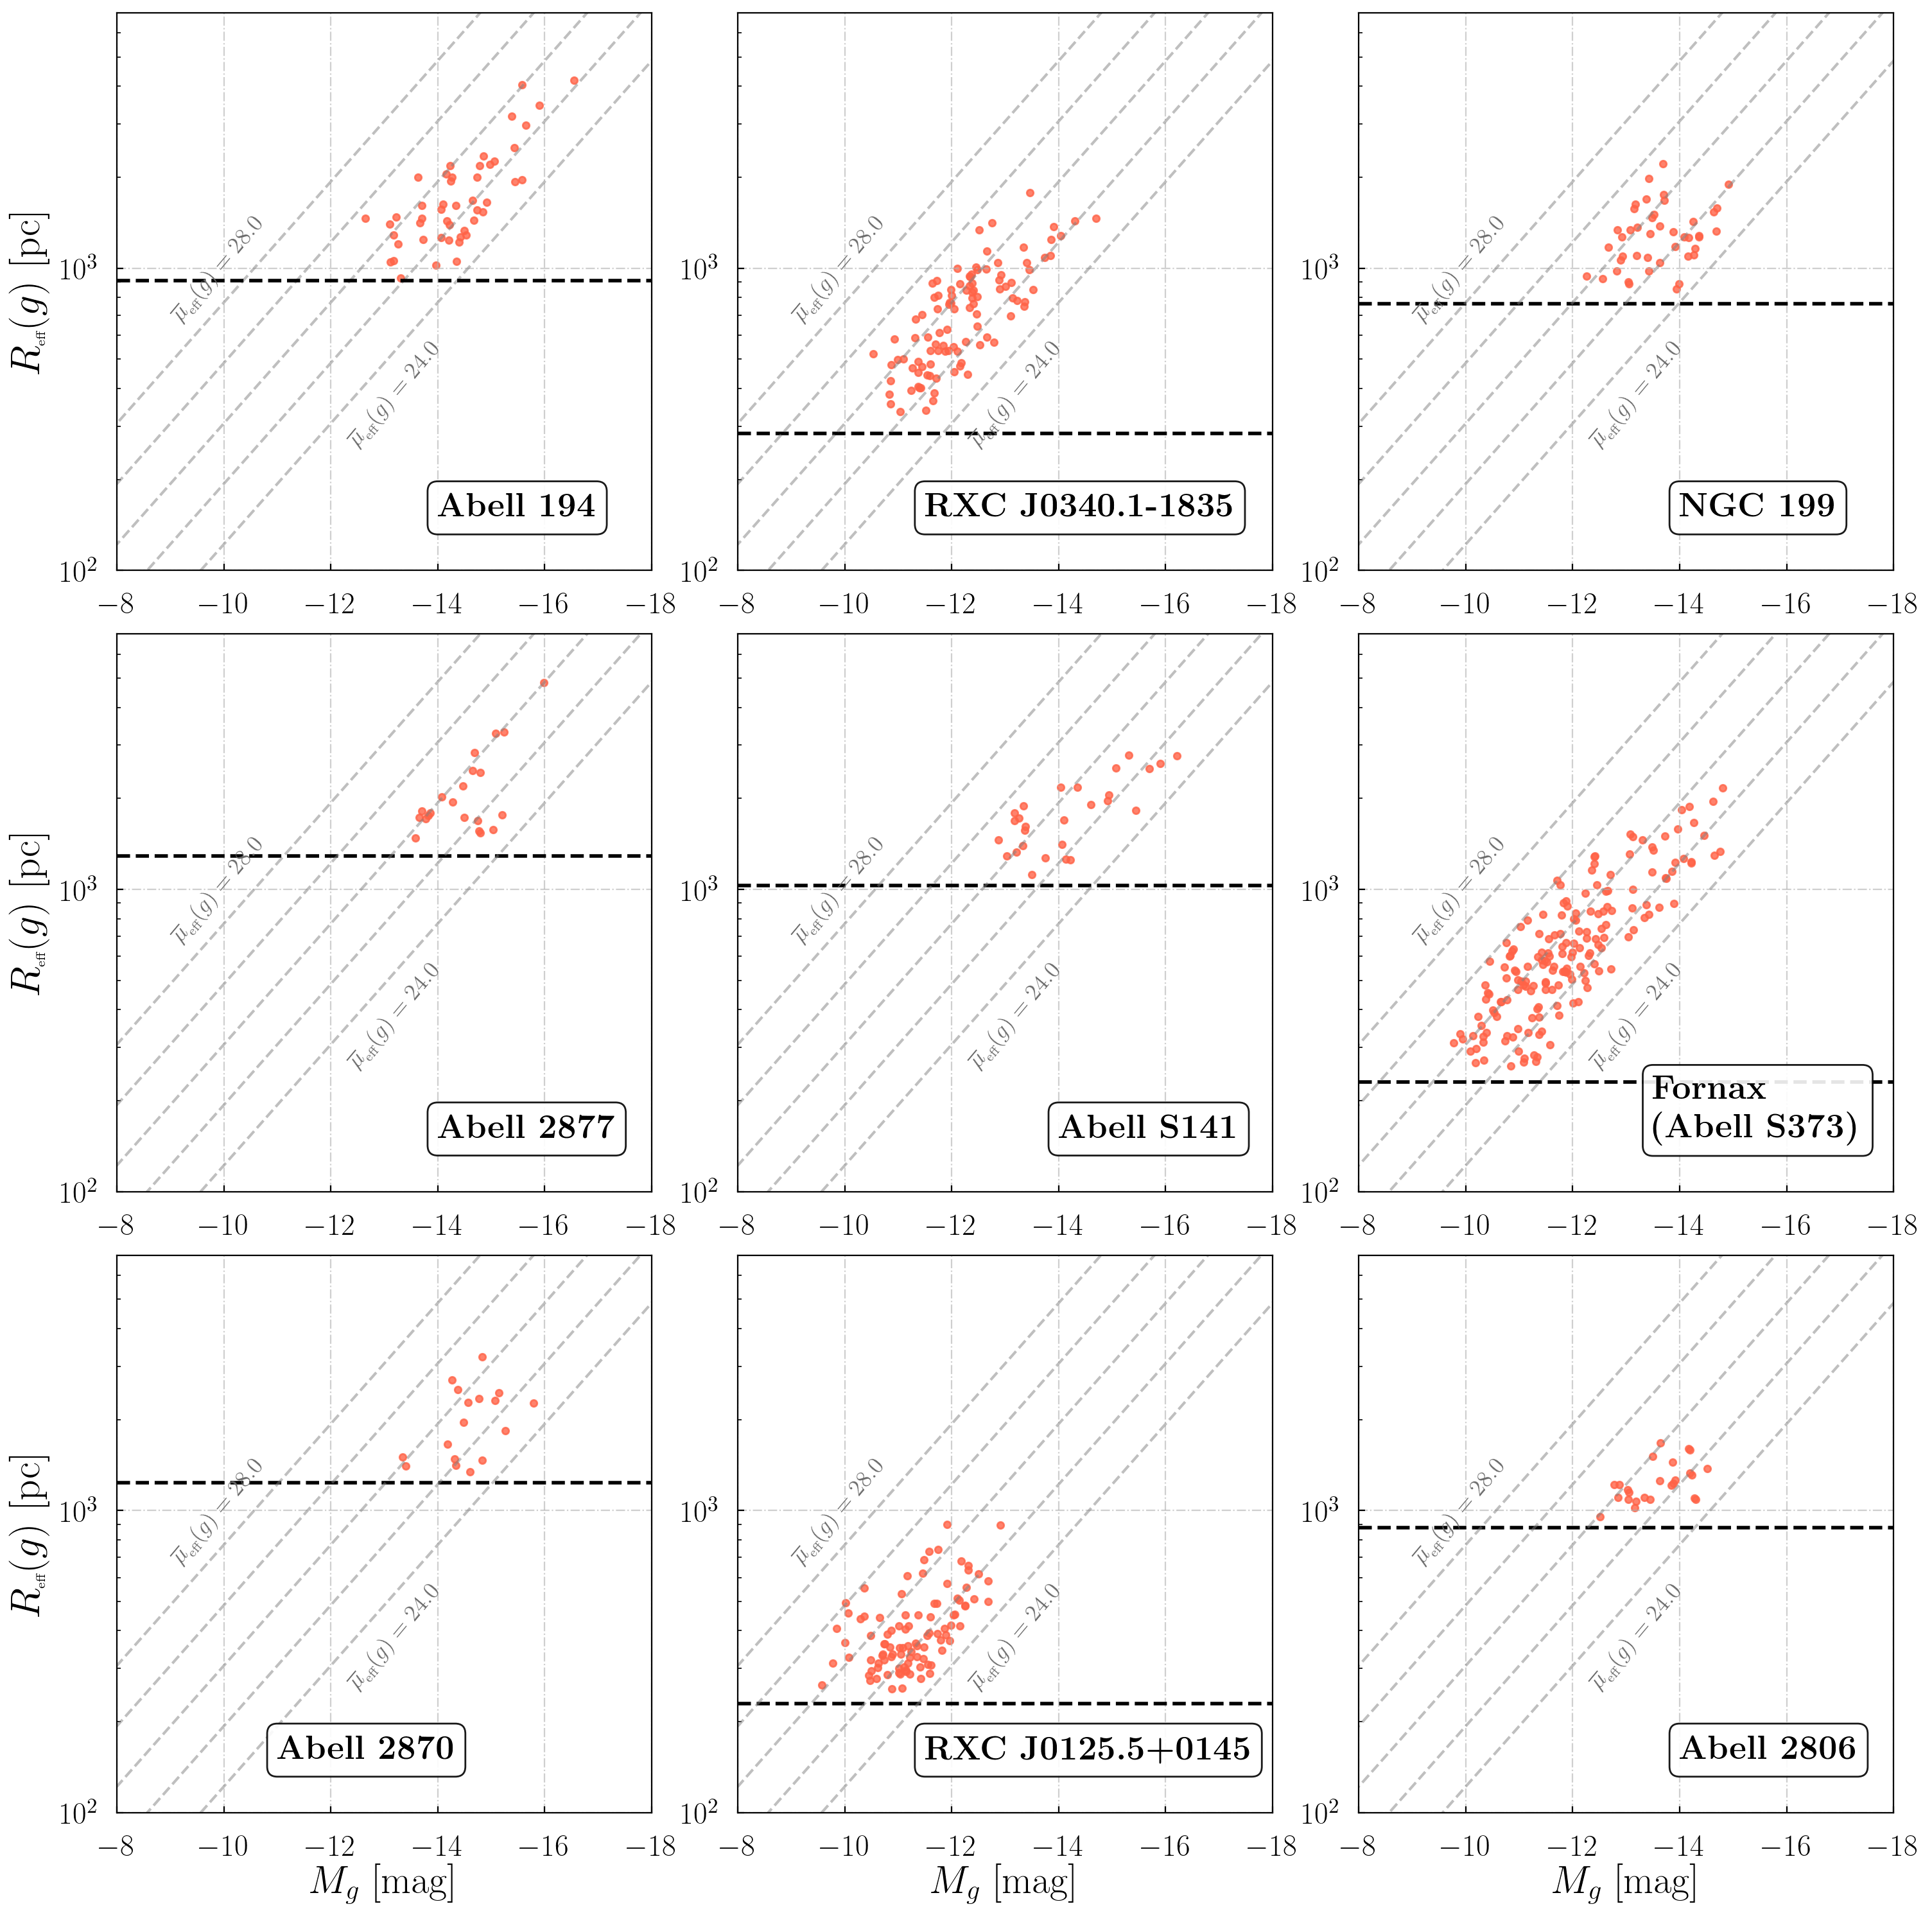

In [19]:
props = dict(boxstyle='round', facecolor='white', alpha=0.9)


# =====================================================
# =====================================================
plot_pretty()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15.0,15.0))

plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)


# ==========================================================
# ==========================================================
# Plots
axes[0,0].scatter(mag_1,rad_1, s=14.0, color='tomato', marker='o', alpha=0.8)


#axes[0,0].plot(x_s,y,color='k',ls='--')
axes[0,0].grid(ls='-.',alpha=0.6)

# Customize
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e2,7e3)
axes[0,0].set_xlim(-8,-18)

axes[0,0].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[0,0].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[0,0].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[0,0].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[0,0].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)

axes[0,0].plot(x_s,lower_lims[0]*np.ones(200),ls='--',c='k',linewidth=2.0)


axes[0,0].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,0].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,0].text(-14,150,r'\textbf{Abell 194}',bbox=props,fontsize=19)

axes[0,0].set_ylabel(r'$R_{\mbox{\scriptsize{eff}}}(g)$ [pc]',fontsize=23)
# ==========================================================
# ==========================================================
# Plots
axes[0,1].scatter(mag_2,rad_2, s=14.0, color='tomato', marker='o', alpha=0.8)

axes[0,1].plot(x_s,lower_lims[1]*np.ones(200),ls='--',c='k',linewidth=2.0)


#axes[0,1].plot(x_s,y,color='k',ls='--')
axes[0,1].grid(ls='-.',alpha=0.6)
# Customize
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e2,7e3)
axes[0,1].set_xlim(-8,-18)

axes[0,1].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[0,1].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[0,1].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[0,1].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[0,1].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[0,1].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,1].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,1].text(-11.5,150,r'\textbf{RXC J0340.1-1835}',bbox=props,fontsize=19)



# ==========================================================
# ==========================================================
# Plots 
axes[0,2].scatter(mag_3,rad_3, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[0,2].plot(x_s,lower_lims[2]*np.ones(200),ls='--',c='k',linewidth=2.0)



#axes[0,2].plot(x_s,y,color='k',ls='--')
axes[0,2].grid(ls='-.',alpha=0.6)

# Customize
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e2,7e3)
axes[0,2].set_xlim(-8,-18)

axes[0,2].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[0,2].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[0,2].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[0,2].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[0,2].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[0,2].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,2].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[0,2].text(-14,150,r'\textbf{NGC 199}',bbox=props,fontsize=19)


# ==========================================================
# ==========================================================
# Plots
axes[1,0].scatter(mag_4,rad_4, s=14.0, color='tomato', marker='o', alpha=0.8)

axes[1,0].plot(x_s,lower_lims[3]*np.ones(200),ls='--',c='k',linewidth=2.0)

#axes[1,0].plot(x_s,y,color='k',ls='--')
axes[1,0].grid(ls='-.',alpha=0.6)


# Customize
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e2,7e3)
axes[1,0].set_xlim(-8,-18)


axes[1,0].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[1,0].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[1,0].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[1,0].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[1,0].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[1,0].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,0].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,0].text(-14,150,r'\textbf{Abell 2877}',bbox=props,fontsize=19)

axes[1,0].set_ylabel(r'$R_{\mbox{\scriptsize{eff}}}(g)$ [pc]', fontsize=23)
# ==========================================================
# ==========================================================
# Plots
axes[1,1].scatter(mag_5,rad_5, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[1,1].plot(x_s,lower_lims[4]*np.ones(200),ls='--',c='k',linewidth=2.0)


#axes[1,1].plot(x_s,y,color='k',ls='--')
axes[1,1].grid(ls='-.',alpha=0.6)

# Customize
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e2,7e3)
axes[1,1].set_xlim(-8,-18)

axes[1,1].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[1,1].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[1,1].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[1,1].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[1,1].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[1,1].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,1].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,1].text(-14,150,r'\textbf{Abell S141}',bbox=props,fontsize=19)


# ==========================================================
# ==========================================================
# Plots
axes[1,2].scatter(mag_6,rad_6, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[1,2].plot(x_s,lower_lims[5]*np.ones(200),ls='--',c='k',linewidth=2.0)



#axes[1,2].plot(x_s,y,color='k',ls='--')
axes[1,2].grid(ls='-.',alpha=0.6)

# Customize
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e2,7e3)
axes[1,2].set_xlim(-8,-18)

axes[1,2].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[1,2].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[1,2].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[1,2].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[1,2].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[1,2].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,2].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[1,2].text(-13.5,150,r'\textbf{Fornax}''\n' r'\textbf{(Abell S373)}',bbox=props,fontsize=19)


# ==========================================================
# ==========================================================
# Plots
axes[2,0].scatter(mag_7,rad_7, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[2,0].plot(x_s,lower_lims[6]*np.ones(200),ls='--',c='k',linewidth=2.0)

#axes[2,0].plot(x_s,y,color='k',ls='--')
axes[2,0].grid(ls='-.',alpha=0.6)

# Customize
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e2,7e3)
axes[2,0].set_xlim(-8,-18)

axes[2,0].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[2,0].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[2,0].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[2,0].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[2,0].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[2,0].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[2,0].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[2,0].text(-11,150,r'\textbf{Abell 2870}',bbox=props,fontsize=19)


axes[2,0].set_ylabel(r'$R_{\mbox{\scriptsize{eff}}}(g)$ [pc]', fontsize = 23)
axes[2,0].set_xlabel(r'$M_g$ [mag]', fontsize = 22)
# ==========================================================
# ==========================================================
# Plots
axes[2,1].scatter(mag_8,rad_8, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[2,1].plot(x_s,lower_lims[7]*np.ones(200),ls='--',c='k',linewidth=2.0)
#axes[2,1].plot(x_s,y,color='k',ls='--')
axes[2,1].grid(ls='-.',alpha=0.6)

# Customize
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e2,7e3)
axes[2,1].set_xlim(-8,-18)

axes[2,1].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[2,1].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[2,1].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[2,1].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[2,1].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[2,1].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[2,1].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)
axes[2,1].text(-11.5,150,r'\textbf{RXC J0125.5+0145}',bbox=props,fontsize=19)

axes[2,1].set_xlabel(r'$M_g$ [mag]', fontsize = 22)
# =====================================================================================
# =====================================================================================
# =====================================================================================
# Plots
axes[2,2].scatter(mag_9,rad_9, s=14.0, color='tomato', marker='o', alpha=0.8)
axes[2,2].plot(x_s,lower_lims[8]*np.ones(200),ls='--',c='k',linewidth=2.0)


#axes[2,2].plot(x_s,y,color='k',ls='--')
axes[2,2].grid(ls='-.',alpha=0.6)
# Customize
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e2,7e3)
axes[2,2].set_xlim(-8,-18)

axes[2,2].plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
axes[2,2].plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
axes[2,2].plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
axes[2,2].plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
axes[2,2].plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


axes[2,2].text(-9,1.3e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=28.0$',color='dimgray',fontsize=13, rotation=50)
axes[2,2].text(-12.3,500, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.0$',color='dimgray',fontsize=13, rotation=50)

axes[2,2].text(-14,150,r'\textbf{Abell 2806}',bbox=props,fontsize=19)





axes[2,2].set_xlabel(r'$M_g$ [mag]', fontsize = 22)

plt.tight_layout()
plt.savefig('Size_lum.pdf')
plt.show()

In [12]:
print(lower_lims)

[ 909.8746745  283.7373935  761.2791835 1292.1505135 1027.80568
  229.9230395 1236.6393105  229.9230395  876.543712  1457.2296805]


In [13]:
arc_to_rad = 20*4.84814
upper_lims = arc_to_rad*np.asarray(peaks_dists)
print(upper_lims/1000)

[ 7.2789974   2.26989915  6.09023347 10.33720411  8.22244544  1.83938432
  9.89311448  1.83938432  7.0123497  11.65783744]


In [14]:
ra_all = np.concatenate([rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_9])
mag_all = np.concatenate([mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,mag_9])

In [15]:
print(np.min(ra_all))
print(np.max(ra_all))
print(np.median(ra_all))

256.824123271296
4833.13598662272
798.6233982064799


In [16]:
print(np.min(mag_all))
print(np.max(mag_all))
print(np.median(mag_all))

-16.553687079331926
-9.569409654443312
-12.376909068483123


In [17]:
# Angular number density of our total sample
print(len(RA)/5247.363)

4.53370578708


### Size-Luminosity relation and comparison with NGFS in the $i-$band

Let's first get the $i$ magnitude and effective radius of the NGFS sample in the i band.

In [18]:
mag_i_outer, reff_i_outer = np.loadtxt("NGFS_props_outer.dat", usecols=(7,10), unpack=3)
mag_i_inner = np.loadtxt("photometric_inner.dat", usecols=(5), unpack=3)
Reff_i_inner = np.loadtxt("structural_inner.dat", usecols=(4), unpack=3)*1000.

Convert that to absolute magnitude and , using that the distance to Fornax, that we find to be 18.97 Mpc.

For the absolute magnitude I use that (from the distance modulus):

\begin{equation}
M = m - 5 \log_{10} \left(\frac{d}{10 \mbox{pc}} \right)
\end{equation}

As for the conversion of the effective radius:

\begin{equation}
R_{eff}(pc) = R_{eff}(rad)\times dist(pc)
\end{equation}

In [18]:
arcsec_to_rad = 4.84814e-6
dist_Forn = 18.97e6

abs_mag_i_outer = mag_i_outer  - 5.0*np.log10(dist_Forn/10.0)
abs_mag_i_inner = mag_i_inner  - 5.0*np.log10(dist_Forn/10.0)
Reff_i_outer = reff_i_outer*arcsec_to_rad*dist_Forn

R_eff_i_NGFS = np.concatenate([Reff_i_inner,Reff_i_outer])
abs_mag_i_NGFS = np.concatenate([abs_mag_i_inner ,abs_mag_i_outer])
#print(Reff_i_outer)


Mag_g_lsb = np.concatenate([mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,mag_9])
Mag_i_lsb = np.concatenate([mag_i_1,mag_i_2,mag_i_3,mag_i_4,mag_i_5,mag_i_6,mag_i_7,mag_i_8,mag_i_9])
R_eff_g_lsb = np.concatenate([rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_9])
R_eff_i_lsb = np.concatenate([rad_i_1,rad_i_2,rad_i_3,rad_i_4,rad_i_5,rad_i_6,rad_i_7,rad_i_8,rad_i_9])
mu_cent_lsb = np.concatenate([mu_cent_1,mu_cent_2,mu_cent_3,mu_cent_4,mu_cent_5,mu_cent_6,mu_cent_7,mu_cent_8,mu_cent_9])

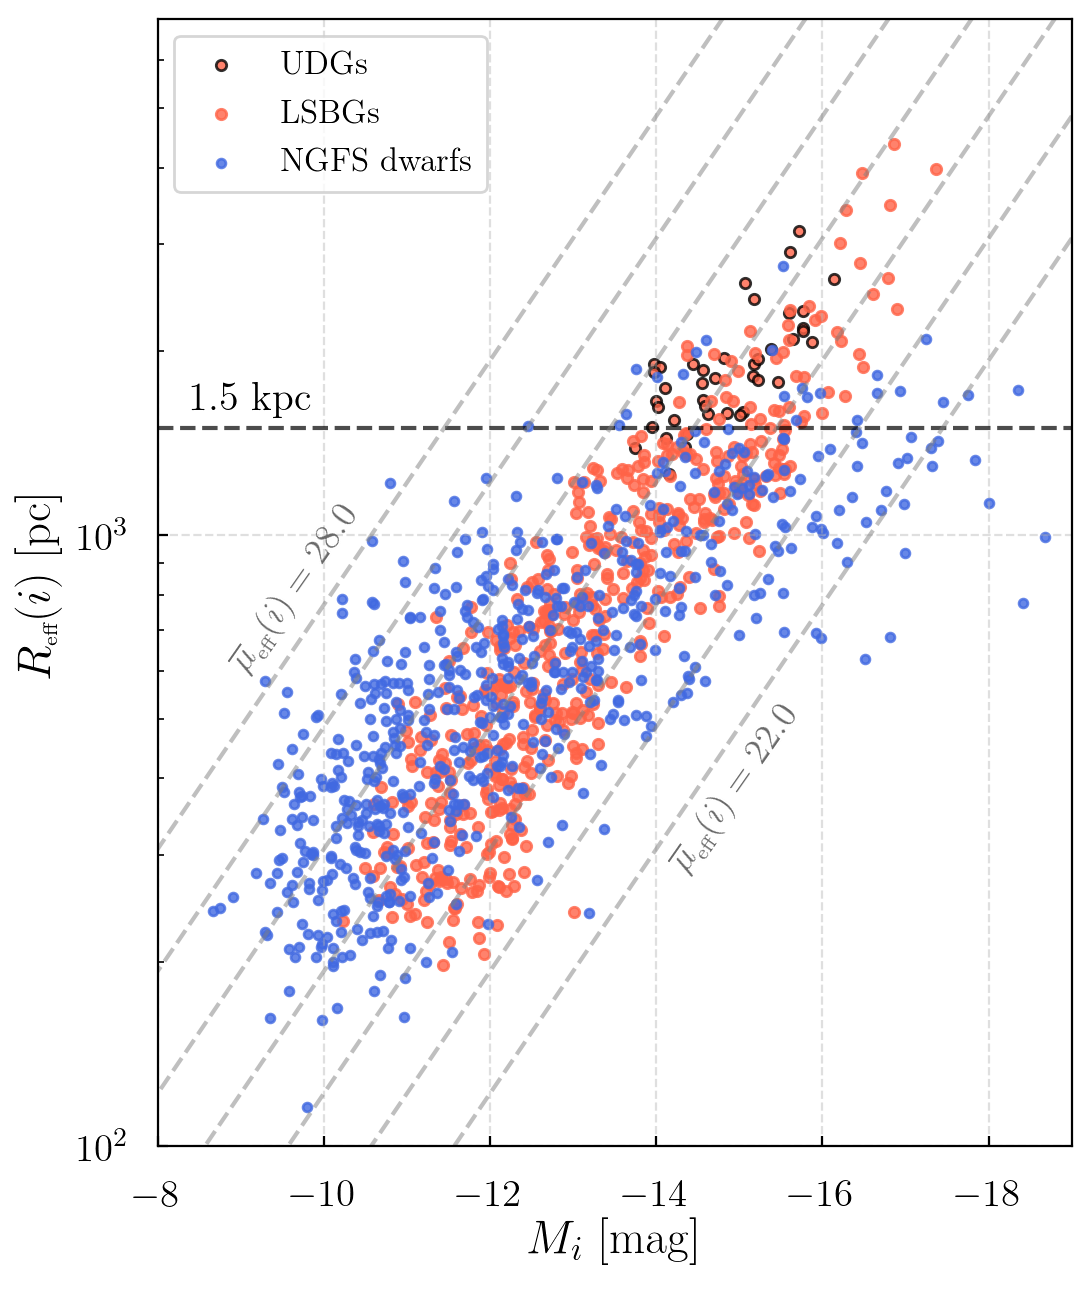

In [23]:
x_s = np.linspace(-8,-19,200)
y_s = 1839.33*np.ones(200)
y_s = 1500.0*np.ones(200)
y_s_2 = 229.91*np.ones(200)
R_arr_23 = R_arr(23.)
R_arr_22 = R_arr(22.)

plt.figure(figsize = (5.5,6.5))

plt.scatter(Mag_i_lsb[(R_eff_g_lsb>1500)&(mu_cent_lsb>24.0)],
            R_eff_i_lsb[(R_eff_g_lsb>1500)&(mu_cent_lsb>24.0)],
            s=14.0, color='tomato', marker='o',edgecolor='k', alpha=0.8,
           label='UDGs')


#plt.scatter(abs_mag_i,R_eff_i,s=10,color='royalblue', marker='o',
#            alpha=0.8, label='NGFS dwarfs')

plt.scatter(Mag_i_lsb[(R_eff_g_lsb<1500)|(mu_cent_lsb<24.0)],
            R_eff_i_lsb[(R_eff_g_lsb<1500)|(mu_cent_lsb<24.0)],
            s=14.0, color='tomato', marker='o', alpha=0.8,
            label='LSBGs')



plt.scatter(abs_mag_i_NGFS,R_eff_i_NGFS,s=10,color='royalblue', marker='o',
            alpha=0.8, label='NGFS dwarfs')

plt.plot(x_s,y_s, ls='--', color='k',alpha=0.7)
#plt.plot(x_s,y_s_2, ls='--', color='k',alpha=0.7)
plt.plot(M_mag, R_arr_22, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_23, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_24, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_25, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_26, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_27, ls='--',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_28, ls='--',color='gray', alpha=0.5)


plt.text(-8.85,1.02e3, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(i)=28.0$',
         color='dimgray',fontsize=13, rotation=55)
plt.text(-14.15,480, '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(i)=22.0$',
         color='dimgray',fontsize=13, rotation=55)
plt.text(-8.4,1.6e3, '1.5 kpc', fontsize = 14.5)

plt.yscale('log')
plt.ylim(1e2,7e3)
plt.xlim(-8,-19)
plt.grid(ls='--',alpha=0.4)
plt.tick_params(axis='both', labelsize=14)

plt.xlabel('$M_i$ [mag]', fontsize=17)
plt.ylabel('$R_{\mbox{\scriptsize{eff}}}(i)$ [pc]', fontsize=17)

plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('Size_Lumin_OC.pdf')
plt.show()

In [20]:
print(len(Mag_i_lsb[(R_eff_g_lsb>1500)&(mu_cent_lsb>24.0)]))

41


In [21]:
print(len(Mag_i_lsb))

555


In [22]:
print(41.0/555.0)

0.0738738738739


In [37]:
print(np.mean(Mag_g_lsb))

-12.559612023493642
